In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# first i have 9 seconds video of the road lanes that will apply the lane detection on
# i will extract some frames from the video to apply the lane detection on

In [37]:
def extract_frames(input_video_path:str ,output_images_path:str  , frame_rate_per_second: int):
    """
    input_video_path: path to the video file
    output_images_path: path where extracted frames will be saved
    frame_rate_per_second: the rate at which to extract the frames

    example: if you set the frame_rate_per_second to 1, in a 15 seconds video it will extract 15 frames
    if it's set to 2 it will extract 30 images.
    """
    assert frame_rate_per_second > 0, "frame rate must be greater than 0"
    assert input_video_path.endswith('.mp4'), "input video must be in mp4 format"
    assert os.path.exists(input_video_path), "input video path does not exist"
    
    if not os.path.exists(output_images_path):
        os.makedirs(output_images_path, exist_ok=True)

    frame_count = 0
    counter = 0

    cap = cv2.VideoCapture(input_video_path)
    assert cap.isOpened(), "Error opening video file"

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("Reached the end of the video")
            break
        frame_count += 1
        if frame_count % int(cap.get(5) / frame_rate_per_second) == 0:
            counter +=1
            cv2.imwrite(f"{output_images_path}/frame_{frame_count}.jpg", frame)
        
    cap.release()
    cv2.destroyAllWindows()
    print(f"Extracted {counter} frames successfully to the path: {output_images_path}")


In [38]:
#extract_frames("../Data/road_video_dashcam_1.mp4", "../Data/images", 1)

Video information:
Width: 2592.0
Reached the end of the video
Extracted 9 frames successfully to the path: ../Data/images


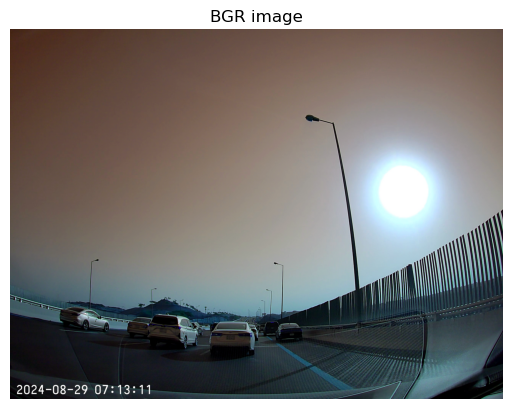

In [4]:
image = cv2.imread("../Data/images/frame_30.jpg")
plt.title("BGR image")
plt.axis('off')
plt.imshow(image)

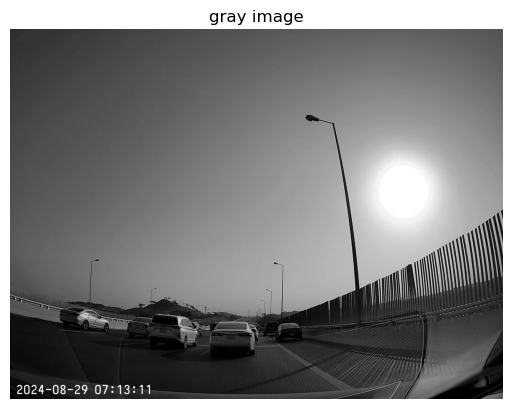

In [5]:
gray = image.copy()
gray = cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.title("gray image")
plt.axis('off')
plt.imshow(gray, cmap='gray')

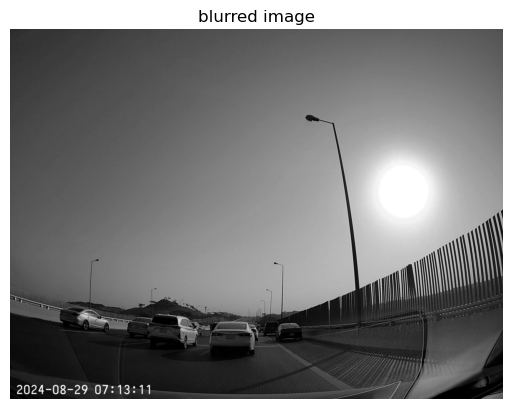

In [6]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.figure()
plt.title("blurred image")
plt.axis('off')
plt.imshow(blurred, cmap='gray')